In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [61]:
project = pd.read_csv('../Data/project_lists.csv')
details = pd.read_csv('../Data/Overview_Details.csv', header=None)
details.columns = ["Crypto Name", "Service", "Total Raised", "Description", "Links"]
funding = pd.read_csv('../Data/Funding_Details.csv')

In [62]:
data

,Unnamed: 0,Name,Funding Round,First Funding Date,Raised Amount,Valuation Amount,Investors,Crypto Name,Service,Total Raised,Description,Links,First Funding Year,First Funding Month,First Funding Day
0,0,Raiinmaker,Seed,2024-04-03,$ 7.50M,NaN,"Jump Capital, Cypher Capital, MEXC, Gate.io",Raiinmaker,Blockchain Service,300000.0,Raiinmaker is a project focused on acceleratin...,"[[[['https://cryptorank.io/blockchains/base'],...",2024.0,4.0,3.0
1,1,Satoshisync,Undisclosed,2024-04-03,NaN,NaN,"ZBS CAPITAL, Maven Capital, MH Ventures, Chain...",Satoshisync,DeFi,NaN,SatoshiSync is The Permissionless Chain Agnost...,NaN,2024.0,4.0,3.0
2,2,Legitimate,Seed,2024-04-03,$ 4.30M,NaN,"Lemniscap, Sfermion, Draper Associates, Verbal",Legitimate,Blockchain Infrastructure,4300000.0,Legitimate presents an on-chain framework meti...,[[[['https://cryptorank.io/categories/blockcha...,2024.0,4.0,3.0
3,3,Mangata,Undisclosed,2024-04-03,$ 5.00M,80000000.0,"Polychain Capital, CMS Holdings, Master Ventur...",Mangata,Blockchain Infrastructure,10600000.0,Gasp offers native cross-chain swaps without r...,[[[['https://cryptorank.io/categories/blockcha...,2024.0,4.0,3.0
4,4,Bonus-Block,Undisclosed,2024-04-02,$ 2.30M,NaN,"ZBS CAPITAL, Rarestone Capital, Faculty Group,...",Bonus-Block,Blockchain Service,NaN,BonusBlock is a Web3 marketing platform that i...,NaN,2024.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,319,Startale-Labs,Series A,2024-02-06,$ 3.50M,63500000.0,"SamsungNext, Signum Capital",Startale-Labs,Blockchain Infrastructure,7000000.0,Startale Labs is a web3 tech company developin...,"[[[['https://startale.org/', 'https://twitter....",2024.0,2.0,6.0
320,320,Lends,Undisclosed,2024-02-05,NaN,NaN,"Maven Capital, Dewhales, Ape Terminal, Cogiten...",Lends,DeFi,NaN,Cross-chain lending solution with access to th...,NaN,2024.0,2.0,5.0
321,321,Carry-1St,NaN,NaN,NaN,NaN,NaN,Carry-1St,GameFi,55500000.0,NaN,[[[['https://cryptorank.io/categories/gamefi']...,NaN,NaN,NaN
322,322,Kodiakfi,NaN,NaN,NaN,NaN,NaN,Kodiakfi,DeFi,2000000.0,Kodiak is a foundational building block for li...,"[[[['https://cryptorank.io/categories/defi'], ...",NaN,NaN,NaN


In [71]:
# data = data[data['Service']==servicae.replace("Service_","")]
processed_data = data.drop(columns=["Crypto Name",  "Raised Amount", "First Funding Date", "Valuation Amount", "Links"])

processed_data.fillna(0, inplace=True)
processed_data = pd.get_dummies(processed_data, columns= ["Service", "Funding Round"], dtype = int)
processed_data["Inverstors_and_desc"] = processed_data["Investors"].astype(str)+" "+processed_data["Description"].astype(str)
processed_data = processed_data.drop(columns=["Investors","Description"])
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# List of numeric column names
numeric_columns = ['Total Raised', 'First Funding Year', 'First Funding Month',
    'First Funding Day', 'Service_Blockchain Infrastructure',
    'Service_Blockchain Service', 'Service_CeFi', 'Service_Chain',
    'Service_DeFi', 'Service_GameFi', 'Service_Social',
    'Service_Stablecoin', 'Funding Round_Angel', 'Funding Round_Pre-Seed',
    'Funding Round_Pre-Series A', 'Funding Round_Seed',
    'Funding Round_Series A', 'Funding Round_Strategic',
    'Funding Round_Undisclosed']

# Apply min-max normalization to each numeric column
processed_data[numeric_columns] = scaler.fit_transform(processed_data[numeric_columns])
mappiiin = processed_data['Name']
processed_data = processed_data[processed_data["Service_DeFi"]==1]
processed_data = processed_data.drop(columns=["Name"])


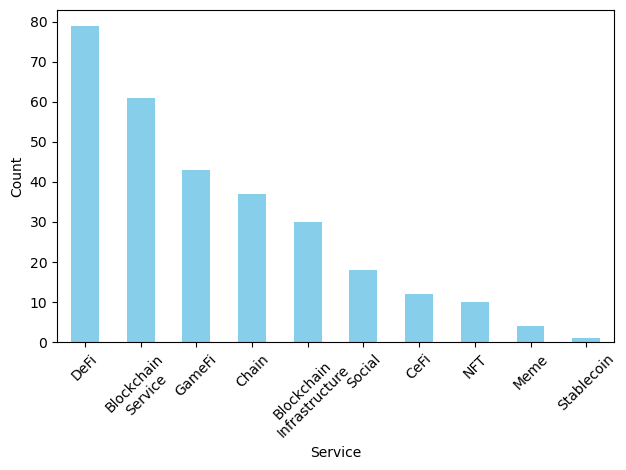

In [12]:
service_counts = details['Service'].value_counts()
service_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Service')
plt.ylabel('Count')
plt.xticks(rotation=45)
tick_labels = [label.replace(' ', '\n') for label in service_counts.index]
plt.xticks(range(len(service_counts)), tick_labels)
plt.tight_layout()
plt.show()

In [19]:
details[details['Total Raised']=="Not Set"]

,Crypto Name,Service,Total Raised,Description,Links
133,Privasea,Blockchain Infrastructure,Not Set,Privasea is a decentralized AI network that le...,NaN
134,Solak-Gpt,DeFi,Not Set,Solak is a decentralized ecosystem that offers...,NaN
178,Privasea,Blockchain Infrastructure,Not Set,Privasea is a decentralized AI network that le...,NaN


In [21]:
# details.dropna(subset=['Total Raised'], inplace=True)
def clean_and_convert(total_raised):
    total_raised = total_raised.replace('$', '')
    total_raised = total_raised.replace('Not Set', 'Nan')
    if 'M' in total_raised:  # Check if 'M' (million) is present
        total_raised = float(total_raised.replace('M', '')) * 10**6
    elif 'K' in total_raised:  # Check if 'K' (thousand) is present
        total_raised = float(total_raised.replace('K', '')) * 10**3
    else:
        total_raised = float(total_raised)  # Convert to float if no 'M' or 'K'
    return total_raised

details['Total Raised'] = details['Total Raised'].astype(str).apply(clean_and_convert)
details.head()

,Crypto Name,Service,Total Raised,Description,Links
0,Raiinmaker,Blockchain Service,300000.0,Raiinmaker is a project focused on acceleratin...,"[[[['https://cryptorank.io/blockchains/base'],..."
1,Satoshisync,DeFi,NaN,SatoshiSync is The Permissionless Chain Agnost...,NaN
2,Legitimate,Blockchain Infrastructure,4300000.0,Legitimate presents an on-chain framework meti...,[[[['https://cryptorank.io/categories/blockcha...
3,Mangata,Blockchain Infrastructure,10600000.0,Gasp offers native cross-chain swaps without r...,[[[['https://cryptorank.io/categories/blockcha...
4,Bonus-Block,Blockchain Service,NaN,BonusBlock is a Web3 marketing platform that i...,NaN


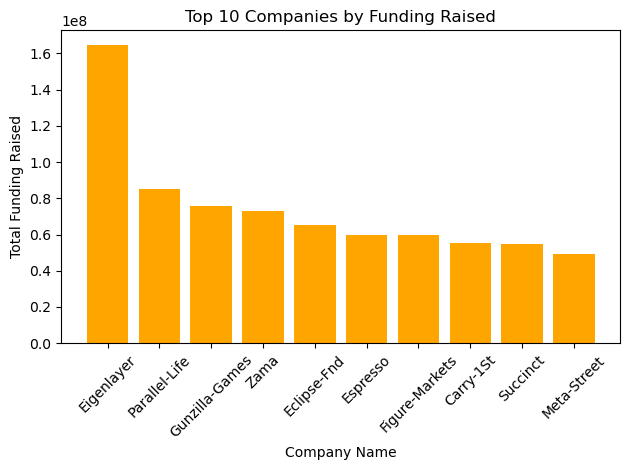

In [22]:
sorted_funding = details.sort_values(by='Total Raised', ascending=False)
top_10 = sorted_funding.head(10)
plt.bar(top_10['Crypto Name'], top_10['Total Raised'], color='orange')
plt.title('Top 10 Companies by Funding Raised')
plt.xlabel('Company Name')
plt.ylabel('Total Funding Raised')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [23]:
from wordcloud import WordCloud
from collections import Counter
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

text = ' '.join(details['Description'])
tokens = nltk.word_tokenize(text)
tokens = [token.lower() for token in tokens]

# Remove stopwords and punctuation
stopwords = nltk.corpus.stopwords.words('english')
common_words = ['users', 'players', 'platform']
tokens = [token for token in tokens if token.isalnum() and token not in stopwords and token not in common_words]

# Count word frequencies
word_freq = Counter(tokens)

wordcloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Description')
plt.axis('off')
plt.show()

TypeError: sequence item 28: expected str instance, float found

In [24]:
details.to_csv('../Data/Cleaned_Overview_Details.csv', sep=',', index=False, encoding='utf-8')

In [25]:
funding.head()

,Name,Funding Details
0,Raiinmaker,['Seed\n3 Apr 2024\nRaised\n$ 7.50M\nInvestors...
1,Satoshisync,['Undisclosed\n3 Apr 2024\nRaised\nN/A\nInvest...
2,Legitimate,['Seed\n3 Apr 2024\nRaised\n$ 4.30M\nInvestors...
3,Mangata,['Undisclosed\n3 Apr 2024\nValuation\n$ 80M\nR...
4,Bonus-Block,['Undisclosed\n2 Apr 2024\nRaised\n$ 2.30M\nIn...


In [26]:
funding['Funding Details'] = funding['Funding Details'].str.strip('[]').str.strip("'").str.split(',').str[0].str.strip()
funding['Funding Details'][3]

"Undisclosed\\n3 Apr 2024\\nValuation\\n$ 80M\\nRaised\\n$ 5.00M\\nInvestors:\\nPolychain Capital\\nCMS Holdings\\nMaster Ventures\\nToken Metrics\\n+2'"

In [33]:
def extract_funding_details(df):
    parts = [item.split('\\n') for item in df['Funding Details']]
    extracted_data = []
    for p in parts:
        try:
            funding_round = p[0]
        except:
            funding_round = 'Undisclosed'
        try:
            first_funding_date = p[1]
        except:
            first_funding_date = ''
        try:
            raised_index = p.index('Raised')
            raised_amount = p[raised_index + 1]
        except:
            raised_amount = np.NaN
        if 'Valuation' in p:
            valuation_index = p.index('Valuation')
            valuation_amount = p[valuation_index + 1]
        else:
            valuation_amount = 'N/A'
        try:
            investors_index = p.index('Investors:')
            investors = [inv for inv in p[investors_index + 1:-1] if inv != 'Lead']
            investors = ', '.join(investors)
        except:
            investors = ''
        extracted_data.append([funding_round, first_funding_date, raised_amount, valuation_amount, investors])
    
    # Create a new DataFrame with the extracted information
    new_df = pd.DataFrame(extracted_data, columns=['Funding Round', 'First Funding Date',
                                                   'Raised Amount', 'Valuation Amount', 'Investors'])
    return new_df

new_funding = funding.drop(columns=['Funding Details'])
new_columns_df = extract_funding_details(funding)

# Concatenate the new DataFrame with the original DataFrame
cleaned_funding = pd.concat([new_funding, new_columns_df], axis=1)
cleaned_funding.head()

,Name,Funding Round,First Funding Date,Raised Amount,Valuation Amount,Investors
0,Raiinmaker,Seed,3 Apr 2024,$ 7.50M,N/A,"Jump Capital, Cypher Capital, MEXC, Gate.io"
1,Satoshisync,Undisclosed,3 Apr 2024,N/A,N/A,"ZBS CAPITAL, Maven Capital, MH Ventures, Chain..."
2,Legitimate,Seed,3 Apr 2024,$ 4.30M,N/A,"Lemniscap, Sfermion, Draper Associates, Verbal"
3,Mangata,Undisclosed,3 Apr 2024,$ 5.00M,$ 80M,"Polychain Capital, CMS Holdings, Master Ventur..."
4,Bonus-Block,Undisclosed,2 Apr 2024,$ 2.30M,N/A,"ZBS CAPITAL, Rarestone Capital, Faculty Group,..."


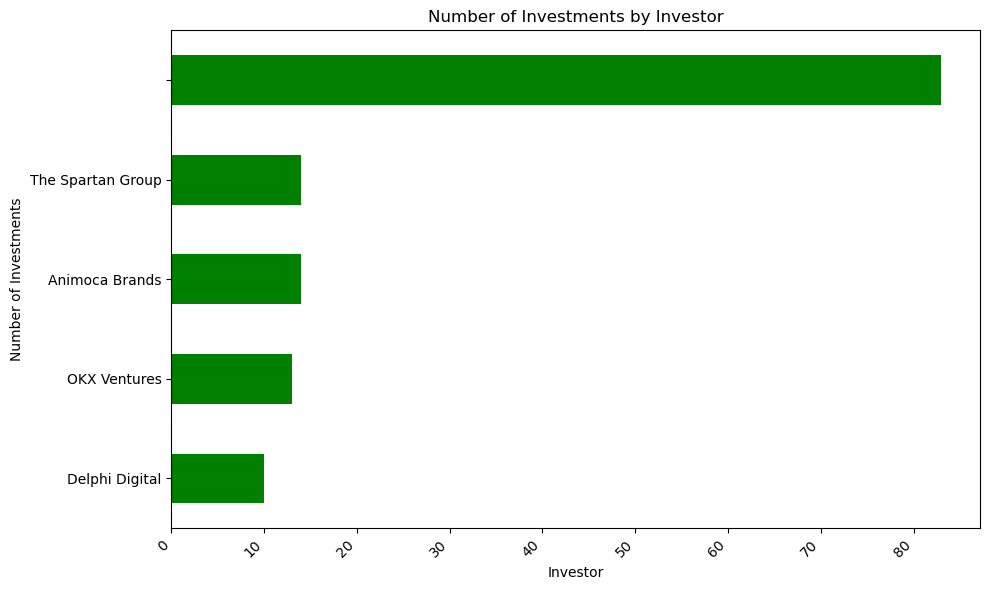

In [34]:
# Find the most common investors

investor_lists = cleaned_funding['Investors'].str.split(', ')
investors_flat = [investor.strip() for sublist in investor_lists for investor in sublist]

# Count the occurrences of each unique investor name
investor_counts = pd.Series(investors_flat).value_counts()
top_5 = investor_counts[:5]

plt.figure(figsize=(10, 6))
top_5.plot(kind='barh', color='green')
plt.title('Number of Investments by Investor')
plt.xlabel('Investor')
plt.ylabel('Number of Investments')
plt.xticks(rotation=45, ha='right')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [35]:
cleaned_funding.to_csv('../Data/Cleaned_Funding_Details.csv', sep=',', index=False, encoding='utf-8')